In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from nets import *
from cfgs import *
from data import *
from clip_ops.clip_ops import *
from trainer import *

In [2]:
%matplotlib inline
save_plot = True
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
D = 201

x = np.linspace(0, 1.0, D)
X_tst = np.stack([v.flatten() for v in np.meshgrid(x,x)], axis = -1)
X_tst[np.where(X_tst.sum(-1) >= 1)] = 0.0
X_tst = np.expand_dims(X_tst, 1)
print(X_tst.shape)

cfg = additive_1x2_uniform_triangle_config.cfg
cfg.test.num_misreports = 1
cfg.test.gd_iter = 0
cfg.test.batch_size = D
cfg.test.num_batches = int(X_tst.shape[0]/cfg.test.batch_size)
cfg.test.save_output = True

(40401, 1, 2)


In [3]:
Net = additive_net.Net
Generator = uniform_triangle_01_generator.Generator
clip_op_lambda = (lambda x: clip_op_triangle_01(x))
Trainer = trainer.Trainer

In [4]:
net = Net(cfg)
generator = Generator(cfg, 'test', X_tst)
clip_op_lambda = (lambda x: tf.assign(x, tf.clip_by_value(x, 0.0, 1.0)))
m = Trainer(cfg, "test", net, clip_op_lambda)
m.test(generator)

INFO:tensorflow:Restoring parameters from experiments/additive_1x2_uniform_triangle/model-400000


2019-02-27 20:59:23,920:INFO:Restoring parameters from experiments/additive_1x2_uniform_triangle/model-400000
2019-02-27 21:01:00,450:INFO:TEST BATCH-0: t = 96.4319, Revenue: 0.241813, Regret: 0.000018, IRP: 0.000000
2019-02-27 21:01:00,461:INFO:TEST BATCH-1: t = 96.4374, Revenue: 0.242169, Regret: 0.000007, IRP: 0.000000
2019-02-27 21:01:00,469:INFO:TEST BATCH-2: t = 96.4425, Revenue: 0.242517, Regret: 0.000003, IRP: 0.000000
2019-02-27 21:01:00,477:INFO:TEST BATCH-3: t = 96.4472, Revenue: 0.242855, Regret: 0.000008, IRP: 0.000000
2019-02-27 21:01:00,485:INFO:TEST BATCH-4: t = 96.4518, Revenue: 0.243183, Regret: 0.000008, IRP: 0.000000
2019-02-27 21:01:00,493:INFO:TEST BATCH-5: t = 96.4562, Revenue: 0.243499, Regret: 0.000000, IRP: 0.000000
2019-02-27 21:01:00,500:INFO:TEST BATCH-6: t = 96.4604, Revenue: 0.243803, Regret: 0.000006, IRP: 0.000000
2019-02-27 21:01:00,507:INFO:TEST BATCH-7: t = 96.4645, Revenue: 0.244094, Regret: 0.000004, IRP: 0.000000
2019-02-27 21:01:00,514:INFO:TEST 

2019-02-27 21:01:00,835:INFO:TEST BATCH-75: t = 96.6579, Revenue: 0.249084, Regret: 0.000004, IRP: 0.000000
2019-02-27 21:01:00,840:INFO:TEST BATCH-76: t = 96.6607, Revenue: 0.249092, Regret: 0.000006, IRP: 0.000000
2019-02-27 21:01:00,846:INFO:TEST BATCH-77: t = 96.6642, Revenue: 0.249097, Regret: 0.000005, IRP: 0.000000
2019-02-27 21:01:00,851:INFO:TEST BATCH-78: t = 96.6669, Revenue: 0.249097, Regret: 0.000026, IRP: 0.000000
2019-02-27 21:01:00,857:INFO:TEST BATCH-79: t = 96.6704, Revenue: 0.249094, Regret: 0.000011, IRP: 0.000000
2019-02-27 21:01:00,861:INFO:TEST BATCH-80: t = 96.6732, Revenue: 0.249086, Regret: 0.000002, IRP: 0.000000
2019-02-27 21:01:00,867:INFO:TEST BATCH-81: t = 96.6767, Revenue: 0.249072, Regret: 0.000002, IRP: 0.000000
2019-02-27 21:01:00,872:INFO:TEST BATCH-82: t = 96.6803, Revenue: 0.249053, Regret: 0.000007, IRP: 0.000000
2019-02-27 21:01:00,877:INFO:TEST BATCH-83: t = 96.6831, Revenue: 0.249027, Regret: 0.000023, IRP: 0.000000
2019-02-27 21:01:00,881:INFO

2019-02-27 21:01:01,208:INFO:TEST BATCH-151: t = 96.8797, Revenue: 0.139308, Regret: 0.000000, IRP: 0.000000
2019-02-27 21:01:01,212:INFO:TEST BATCH-152: t = 96.8826, Revenue: 0.136507, Regret: 0.000000, IRP: 0.000000
2019-02-27 21:01:01,217:INFO:TEST BATCH-153: t = 96.8853, Revenue: 0.133703, Regret: 0.000000, IRP: 0.000000
2019-02-27 21:01:01,222:INFO:TEST BATCH-154: t = 96.8880, Revenue: 0.130895, Regret: 0.000000, IRP: 0.000000
2019-02-27 21:01:01,226:INFO:TEST BATCH-155: t = 96.8908, Revenue: 0.128083, Regret: 0.000000, IRP: 0.000000
2019-02-27 21:01:01,231:INFO:TEST BATCH-156: t = 96.8938, Revenue: 0.125269, Regret: 0.000000, IRP: 0.000000
2019-02-27 21:01:01,236:INFO:TEST BATCH-157: t = 96.8970, Revenue: 0.122452, Regret: 0.000000, IRP: 0.000000
2019-02-27 21:01:01,241:INFO:TEST BATCH-158: t = 96.9004, Revenue: 0.119632, Regret: 0.000000, IRP: 0.000000
2019-02-27 21:01:01,245:INFO:TEST BATCH-159: t = 96.9031, Revenue: 0.116810, Regret: 0.000000, IRP: 0.000000
2019-02-27 21:01:01

In [5]:
alloc = np.load(os.path.join(cfg.dir_name, "alloc_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,2)
pay = np.load(os.path.join(cfg.dir_name, "pay_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,1)

In [6]:
from copy import copy
palette = copy(plt.cm.YlOrRd)
palette.set_over('w')
x = np.linspace(0, 1.0, D)
m = np.stack([v.flatten() for v in np.meshgrid(x,x)], axis = -1).reshape(D,D,2)
mask = m.sum(-1)>1.0

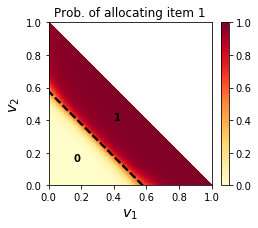

In [7]:
x1 = np.sqrt(1.0/3.0)
points = [(x1, 0), (0, x1)]
x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))
plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')

plt.axis([0, 1.0, 0, 1.0])
plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
a1 = alloc[:, :, 0]
a1[mask] = 10.0
img = ax.imshow(a1[::-1,:], extent=[0,1,0,1], vmin = 0.0, vmax=1.0, cmap = palette)

plt.text(0.15, 0.15, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(0.4, 0.4, s='1', color='black', fontsize='10', fontweight='bold')

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 1')
_ = plt.colorbar(img, fraction=0.046, pad=0.04)
if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc1.pdf'), bbox_inches = 'tight', pad_inches = 0.05)

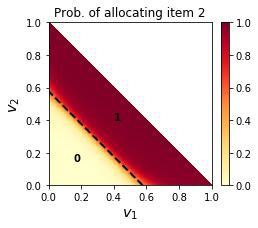

In [8]:
x1 = np.sqrt(1.0/3.0)
points = [(x1, 0), (0, x1)]
x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))

plt.axis([0, 1.0, 0, 1.0])
plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
a2 = alloc[:, :, 1]
a2[mask] = 10.0
img = ax.imshow(a2[::-1, :], extent=[0,1,0,1], vmin = 0.0, vmax=1.0, cmap = palette)


plt.text(0.15, 0.15, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(0.4, 0.4, s='1', color='black', fontsize='10', fontweight='bold')

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 2')
_ = plt.colorbar(img, fraction=0.046, pad=0.04)
if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc2.pdf'), bbox_inches = 'tight', pad_inches = 0.05)

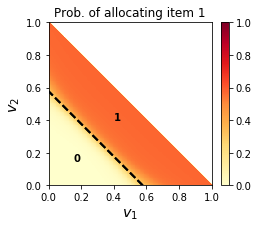

In [9]:
x1 = np.sqrt(1.0/3.0)
points = [(x1, 0), (0, x1)]
x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))
plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')

plt.axis([0, 1.0, 0, 1.0])
plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
a1 = pay[:, :, 0]
a1[mask] = 10.0
img = ax.imshow(a1[::-1,:], extent=[0,1,0,1], vmin = 0.0, vmax=1.0, cmap = palette)

plt.text(0.15, 0.15, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(0.4, 0.4, s='1', color='black', fontsize='10', fontweight='bold')

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 1')
_ = plt.colorbar(img, fraction=0.046, pad=0.04)
if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc1.pdf'), bbox_inches = 'tight', pad_inches = 0.05)